<h1>Содержание<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Изучение-данных-из-файла" data-toc-modified-id="Изучение-данных-из-файла-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Изучение данных из файла</a></span><ul class="toc-item"><li><span><a href="#Описание-данных" data-toc-modified-id="Описание-данных-1.1"><span class="toc-item-num">1.1&nbsp;&nbsp;</span>Описание данных</a></span></li></ul></li><li><span><a href="#Предобработка-данных" data-toc-modified-id="Предобработка-данных-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Предобработка данных</a></span><ul class="toc-item"><li><span><a href="#Вывод" data-toc-modified-id="Вывод-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Вывод</a></span></li></ul></li><li><span><a href="#Расчёты-и-добавление-результатов-в-таблицу" data-toc-modified-id="Расчёты-и-добавление-результатов-в-таблицу-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Расчёты и добавление результатов в таблицу</a></span></li><li><span><a href="#Исследовательский-анализ-данных" data-toc-modified-id="Исследовательский-анализ-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Исследовательский анализ данных</a></span><ul class="toc-item"><li><span><a href="#Площадь,-цена,-число-комнат-и-высота-потолков" data-toc-modified-id="Площадь,-цена,-число-комнат-и-высота-потолков-4.1"><span class="toc-item-num">4.1&nbsp;&nbsp;</span>Площадь, цена, число комнат и высота потолков</a></span></li><li><span><a href="#Время-продажи-квартиры" data-toc-modified-id="Время-продажи-квартиры-4.2"><span class="toc-item-num">4.2&nbsp;&nbsp;</span>Время продажи квартиры</a></span></li><li><span><a href="#Убераем-редкие-и-выбивающиеся-значения" data-toc-modified-id="Убераем-редкие-и-выбивающиеся-значения-4.3"><span class="toc-item-num">4.3&nbsp;&nbsp;</span>Убераем редкие и выбивающиеся значения</a></span></li><li><span><a href="#Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?" data-toc-modified-id="Какие-факторы-больше-всего-влияют-на-стоимость-квартиры?-4.4"><span class="toc-item-num">4.4&nbsp;&nbsp;</span>Какие факторы больше всего влияют на стоимость квартиры?</a></span></li><li><span><a href="#Десять-населённых-пунктов-с-наибольшим-числом-объявлений" data-toc-modified-id="Десять-населённых-пунктов-с-наибольшим-числом-объявлений-4.5"><span class="toc-item-num">4.5&nbsp;&nbsp;</span>Десять населённых пунктов с наибольшим числом объявлений</a></span></li><li><span><a href="#Cегмент-квартир-в-центре." data-toc-modified-id="Cегмент-квартир-в-центре.-4.6"><span class="toc-item-num">4.6&nbsp;&nbsp;</span>Cегмент квартир в центре.</a></span></li></ul></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Общий вывод</a></span></li><li><span><a href="#Чек-лист-готовности-проекта" data-toc-modified-id="Чек-лист-готовности-проекта-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Чек-лист готовности проекта</a></span></li></ul></div>

# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекc Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

## Изучение данных из файла

In [1]:
import pandas as pd
df=pd.read_csv('/datasets/real_estate_data.csv', sep='\t')
display(df.head(10))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,...,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,...,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,...,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,...,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,...,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,...,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,...,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,...,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,...,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


In [2]:
df.info() # получение общей информации о данных в таблице df

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
total_images            23699 non-null int64
last_price              23699 non-null float64
total_area              23699 non-null float64
first_day_exposition    23699 non-null object
rooms                   23699 non-null int64
ceiling_height          14504 non-null float64
floors_total            23613 non-null float64
living_area             21796 non-null float64
floor                   23699 non-null int64
is_apartment            2775 non-null object
studio                  23699 non-null bool
open_plan               23699 non-null bool
kitchen_area            21421 non-null float64
balcony                 12180 non-null float64
locality_name           23650 non-null object
airports_nearest        18157 non-null float64
cityCenters_nearest     18180 non-null float64
parks_around3000        18181 non-null float64
parks_nearest           8079 non-null float64
ponds_around300

### Описание данных
Данные состоят из 22 столбцов и 23699 строк. Столбцы имеют разные типы данных.
Какие данные хранят данные столбцы:
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* balcony — число балконов
* ceiling_height — высота потолков (м)
* cityCenters_nearest — расстояние до центра города (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)
* first_day_exposition — дата публикации
* floor — этаж
* floors_total — всего этажей в доме
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* last_price — цена на момент снятия с публикации
* living_area — жилая площадь в квадратных метрах (м²)
* locality_name — название населённого пункта
* open_plan — свободная планировка (булев тип)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* rooms — число комнат
* studio — квартира-студия (булев тип)
* total_area — площадь квартиры в квадратных метрах (м²)
* total_images — число фотографий квартиры в объявлении

## Предобработка данных

Для начала переименуем колонку cityCenters_nearest в city_сenters_nearest 


In [3]:
df = df.rename(columns={'cityCenters_nearest':'city_сenters_nearest'})
df.columns # проверка результатов - перечень названий столбцов

Index(['total_images', 'last_price', 'total_area', 'first_day_exposition',
       'rooms', 'ceiling_height', 'floors_total', 'living_area', 'floor',
       'is_apartment', 'studio', 'open_plan', 'kitchen_area', 'balcony',
       'locality_name', 'airports_nearest', 'city_сenters_nearest',
       'parks_around3000', 'parks_nearest', 'ponds_around3000',
       'ponds_nearest', 'days_exposition'],
      dtype='object')

Из полученных данных мы видим 22 столбца, пропуски есть в:
* ceiling_height — высота потолков (м)
* floors_total — всего этажей в доме
* living_area — жилая площадь в квадратных метрах (м²)
* is_apartment — апартаменты (булев тип)
* kitchen_area — площадь кухни в квадратных метрах (м²)
* balcony — число балконов
* locality_name — название населённого пункта
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)
* parks_around3000 — число парков в радиусе 3 км
* parks_nearest — расстояние до ближайшего парка (м)
* ponds_around3000 — число водоёмов в радиусе 3 км
* ponds_nearest — расстояние до ближайшего водоёма (м)
* days_exposition — сколько дней было размещено объявление (от публикации до снятия)

In [4]:
df.isna().sum() #количество пропусков в столбцах

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
city_сenters_nearest     5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

Не зная точного адреса или геолакации мы не сможем восполнить пропуски по таким столбцам как:
* ceiling_height — высота потолков (м)
* floors_total — всего этажей в доме
* airports_nearest — расстояние до ближайшего аэропорта в метрах (м)
* cityCenters_nearest — расстояние до центра города (м)
* locality_name — название населённого пункта

Также мы не можем достоверно заполнить пропуски, которые связаны с площадью. Например, мы не можем вычислить площадь кухни. Даже если мы знаем жилую и общую площадь, то в квартире как минимум есть еще коридор и сан.узел, площадь и количество которых мы не знаем. И на мой взгляд заполнение медианным значением тоже будет не корректно, т.к сейчас очень разнообразны планировки.

На данном этапе исследования мы можем убрать пропуски в столбце `balcony`, предполагая что человек не заполнял эту графу, имея ввиду отсутвие балкона в квартире.

Рассмотрим какие данные хранит столбец `balcony`:

In [5]:
df['balcony'].value_counts(dropna=False)

NaN    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [6]:
#заполним пропуски нулями и проверим что получилось
df['balcony']=df['balcony'].fillna('0.0')
df['balcony'].value_counts()

0.0    11519
1.0     4195
0.0     3758
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

In [7]:
#для того, чтобы схлопнулись нули поменяем тип данных по всей колонке и повторно сделаем сортировку для проверки 
df['balcony']=df['balcony'].astype(float)
df['balcony'].value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balcony, dtype: int64

Теперь посмотрим какие данные хранятся в `locality_name`:

In [8]:
df['locality_name'].unique() # посомтрим уникальные значения

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Мы видим, что у большинства названий есть еще и приписка типа населенного пункта, а также встречаются неявные дубли, например, посёлок и поселок. Для того чтобы не перегружать данные и убрать все неявные дубли, создадим новый столбец `locality_name_corrected` и запишем в него только одни названия.

In [9]:
# создадим функцию, которая будет удалять лишнюю инфо и оставлять только названия населенных пунктов
def local_name(name):
 
    if pd.isna(name):
        return name
 
    new_name = []
    for word in name.split():
        if word[0].isupper():
            new_name.append(word)
 
    return " ".join(new_name)

In [10]:
# создадим новый столбец и с помощью метода apply() используем нашу функцию local_name
df['locality_name_corrected'] = df['locality_name'].apply(local_name)
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_corrected
0,20,13000000.0,108.0,2019-03-07T00:00:00,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04T00:00:00,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20T00:00:00,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19T00:00:00,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


Теперь поработаем с датой создания объявления. Преобразуем данные в столбце `first_day_exposition` в формат datatime для дальнейшей работы с этими данными

In [11]:
df['first_day_exposition']=pd.to_datetime(df['first_day_exposition'],format='%Y-%m-%dT%H:%M:%S')
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,balcony,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_corrected
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,0.0,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,0.0,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург


## Расчёты и добавление результатов в таблицу

1. Расчитаем цену за квадратный метр и запишем полученные данные в новый столбец `square_meter`

In [12]:
df['square_meter']=df['last_price']/df['total_area']
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,locality_name,airports_nearest,city_сenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_corrected,square_meter
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.370370
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0,Шушары,82920.792079
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.714286
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.100629
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.000000


Мы заранее преобразовали столбец `first_day_exposition` в формат datatime и теперь можем создать отдельные столбцы дополнительные год, месяц и день недели.

In [13]:
df['year']=df['first_day_exposition'].dt.year
df['weekday']=df['first_day_exposition'].dt.weekday
df['month']=df['first_day_exposition'].dt.month
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_corrected,square_meter,year,weekday,month
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,1.0,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.370370,2019,3,3
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,0.0,NaN,0.0,NaN,81.0,Шушары,82920.792079,2018,1,12
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,1.0,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.714286,2015,3,8
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,2.0,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.100629,2015,4,7
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,2.0,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.000000,2018,1,6


В нашей бае данных есть информация об этаже, на котором находится квартира. Разобьем эти данные на три категории и эту категорию запишем в новый столбец `floor_category`:
* первый
* последний
* другой

In [14]:
# создаем функцию, которая будет на вход принимать значения floor, а на выходе создавать категорию
def floor_category(row): 
    if row['floor']==1:
        return 'первый'
    elif row['floor']==row['floors_total']:
        return 'последний'
    else:
        return 'другой'
    

In [15]:
#используем метод apply, он берёт значения столбца floor и применяет к ним функцию floor_category из своего аргумента
df['floor_category']=df.apply(floor_category,axis=1)
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,locality_name_corrected,square_meter,year,weekday,month,floor_category
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,482.0,2.0,755.0,NaN,Санкт-Петербург,120370.370370,2019,3,3,другой
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,0.0,NaN,81.0,Шушары,82920.792079,2018,1,12,первый
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,90.0,2.0,574.0,558.0,Санкт-Петербург,92785.714286,2015,3,8,другой
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,84.0,3.0,234.0,424.0,Санкт-Петербург,408176.100629,2015,4,7,другой
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,112.0,1.0,48.0,121.0,Санкт-Петербург,100000.000000,2018,1,6,другой


Посчитаем для каждого объявления соотношение жилой площади к общей и соотношение площади кухни к общей:

In [16]:
df['ratio_living']=df['living_area']/df['total_area'] # соотношение жилой площади к общей
df['ratio_kitchen']=df['kitchen_area']/df['total_area'] # соотношение площади кухни к общей
display(df.head(5))

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_corrected,square_meter,year,weekday,month,floor_category,ratio_living,ratio_kitchen
0,20,13000000.0,108.0,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,Санкт-Петербург,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.4,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,81.0,Шушары,82920.792079,2018,1,12,первый,0.460396,0.272277
2,10,5196000.0,56.0,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,574.0,558.0,Санкт-Петербург,92785.714286,2015,3,8,другой,0.612500,0.148214
3,0,64900000.0,159.0,2015-07-24,3,NaN,14.0,NaN,9,NaN,...,234.0,424.0,Санкт-Петербург,408176.100629,2015,4,7,другой,NaN,NaN
4,2,10000000.0,100.0,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,Санкт-Петербург,100000.000000,2018,1,6,другой,0.320000,0.410000


## Исследовательский анализ данных

### Площадь, цена, число комнат и высота потолков

Рассмотрим более детально следующие данные: площадь, цена, число комнат и высота потолков. Для начала построим графики по каждому показателю.

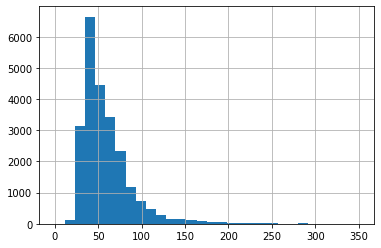

In [63]:
#гистограмма для площади
df['total_area'].hist(bins=30, range=(0, 350))

In [18]:
df['total_area'].describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

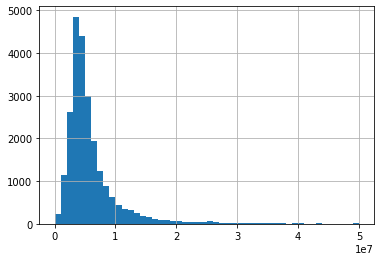

In [68]:
#гистограмма для цены
df['last_price'].hist(bins=50, range=(0, 50000000))

In [20]:
df['last_price'].describe()

count    2.369900e+04
mean     6.541549e+06
std      1.088701e+07
min      1.219000e+04
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

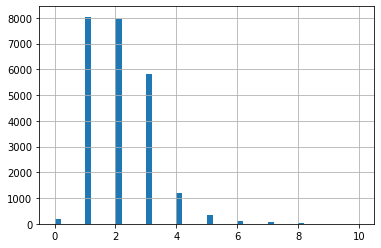

In [21]:
#гистограмма для числа комнат
df['rooms'].hist(bins=50, range=(0, 10))

In [22]:
df['rooms'].describe()

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

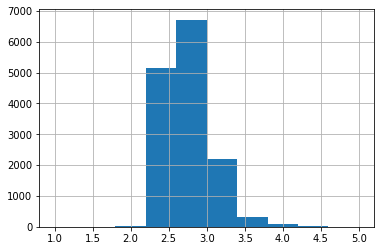

In [80]:
#гистограмма для высоты потолка
df['ceiling_height'].hist(bins=10, range=(1, 5))

Из полученных выше данных мы видим что:
* площадь квартир в основном варьируется от 30 до 100 кв.м, при чем наиболее часто встречающаяся это 40-45 кв.м
* наиболее часто встречающаяся цена за объект это примерно 5 млн руб, в среднем цены варьируются в основном до 10 млн.
* число комнат- чаще всего встречаются объявление на однокомнатные и двухкомнатные квартиры.
* высота пололка - самая распространеная высота 2,6-2,7 м.

Гистограмма цены и площади справа имеет очень длинный хвост, обусловленно этоскорей всего выбросами. С этими данными позже надо будет дополнительно еще поработать и убрать эти аномалии, для улучшения качества исследования.



### Время продажи квартиры

Для начала построим гистограмму и посмотрим сколько времени висело объявление:

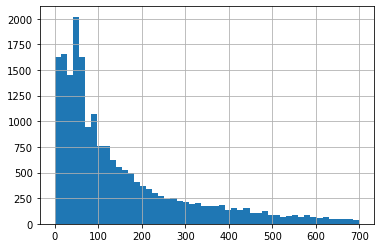

In [24]:
df['days_exposition'].hist(bins=50, range=(0, 700))


In [25]:
df['days_exposition'].describe()

count    20518.000000
mean       180.888634
std        219.727988
min          1.000000
25%         45.000000
50%         95.000000
75%        232.000000
max       1580.000000
Name: days_exposition, dtype: float64

In [26]:
df['days_exposition'].value_counts(dropna=False).head(15)

NaN     3181
45.0     880
60.0     538
7.0      234
30.0     208
90.0     204
4.0      176
3.0      158
5.0      152
14.0     148
9.0      143
8.0      139
20.0     139
44.0     138
11.0     135
Name: days_exposition, dtype: int64

Из полученных данных выше мы видим следующее:
* медиана равна 95 дней
* среднее 180 дней
* min 1 день, а max 1580 дней
* чаще всего объявление висит 45, 60, 7, 30 и 90 дней. Возможно это обусловленно платными периодами размещения объявления. Если не брать в расчет эти периоды, то следующие в рейтинге стоят 4, 3, 5, 14, 9 дней.
* аномально долгие объявления на мой взгляд это как минимум дольше года.

### Убераем редкие и выбивающиеся значения

На мой взгляд редкие и выбивающиеся значения, это:
* комнаты больше 10 шт
* площадь квартиры более 400 м кв
* цена более 50 млн.р
* Высота потолков более 5 м

Для того, чтобы убрать эти значения, надо учесть тот нюанс, что у нас есть пропуски в столбце высота потолков `ceiling_height`. Для этого будем использовать фильтр, где дополнительным условием будет оставить пропуски.

Посмотрим сколько у нас строк с редкими значениями:

In [27]:
print(len(df[df['ceiling_height']>=5]))
print(len(df[df['rooms']>=10]))
print(len(df[df['total_area']>=400]))
print(len(df[df['last_price']>=50000000]))

37
11
26
138


А также если просмотреть глазами каждый список, то мы можем обнаружить, что в списке комнат>=10, есть два пропуска в `ceiling_height`. Поэтому кол для фильтрации мы напишем в две строки.

In [28]:
display((df[df['rooms']>=10])) 

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_corrected,square_meter,year,weekday,month,floor_category,ratio_living,ratio_kitchen
648,3,17500000.0,183.7,2018-07-01,11,3.40,7.0,138.8,7,NaN,...,NaN,NaN,Санкт-Петербург,95264.017420,2018,6,7,последний,0.755580,0.072401
866,5,25000000.0,363.0,2017-12-23,14,3.16,5.0,222.0,4,NaN,...,435.0,418.0,Санкт-Петербург,68870.523416,2017,5,12,другой,0.611570,0.045730
4149,6,23000000.0,272.6,2018-01-11,10,3.14,7.0,145.9,7,NaN,...,531.0,NaN,Санкт-Петербург,84372.707263,2018,3,1,последний,0.535216,0.068966
5358,20,65000000.0,590.0,2019-02-14,15,3.50,6.0,409.0,3,NaN,...,NaN,14.0,Санкт-Петербург,110169.491525,2019,3,2,другой,0.693220,0.169492
9688,8,33000000.0,194.1,2017-02-07,11,3.43,5.0,129.0,2,NaN,...,66.0,813.0,Санкт-Петербург,170015.455951,2017,1,2,другой,0.664606,0.061309
14498,6,32250000.0,374.6,2018-06-09,19,NaN,5.0,264.5,2,NaN,...,548.0,114.0,Санкт-Петербург,86091.831287,2018,5,6,другой,0.706086,0.073679
18119,4,15500000.0,216.1,2016-07-04,10,3.15,5.0,161.4,2,NaN,...,NaN,11.0,Санкт-Петербург,71726.052753,2016,0,7,другой,0.746876,0.091624
18848,6,28500000.0,270.0,2015-03-02,16,3.00,4.0,180.0,4,NaN,...,NaN,1365.0,Санкт-Петербург,105555.555556,2015,0,3,последний,0.666667,0.048148
18891,11,40000000.0,290.0,2016-06-21,10,3.50,6.0,189.4,6,NaN,...,227.0,77.0,Санкт-Петербург,137931.034483,2016,1,6,последний,0.653103,0.103448
19540,8,420000000.0,900.0,2017-12-06,12,2.80,25.0,409.7,25,NaN,...,318.0,106.0,Санкт-Петербург,466666.666667,2017,2,12,последний,0.455222,0.124444


In [29]:
# фильтрами убираем не нужные нам строки, и записываем в новый датафрейм.
df_new=df[(df['ceiling_height'].isna()) | (df['ceiling_height']<5)]
df_new=df_new[(df_new['rooms']<10)&(df_new['total_area']<400)&(df_new['last_price']<50000000)]

display(df_new)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_corrected,square_meter,year,weekday,month,floor_category,ratio_living,ratio_kitchen
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,Санкт-Петербург,120370.370370,2019,3,3,другой,0.472222,0.231481
1,7,3350000.0,40.40,2018-12-04,1,NaN,11.0,18.6,1,NaN,...,NaN,81.0,Шушары,82920.792079,2018,1,12,первый,0.460396,0.272277
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,574.0,558.0,Санкт-Петербург,92785.714286,2015,3,8,другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,Санкт-Петербург,100000.000000,2018,1,6,другой,0.320000,0.410000
5,10,2890000.0,30.40,2018-09-10,1,NaN,12.0,14.4,5,NaN,...,NaN,55.0,Янино-1,95065.789474,2018,0,9,другой,0.473684,0.299342
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,381.0,NaN,Санкт-Петербург,72490.845228,2017,1,3,другой,0.547792,0.103356
23695,14,3100000.0,59.00,2018-01-15,3,NaN,5.0,38.0,4,NaN,...,NaN,45.0,Тосно,52542.372881,2018,0,1,другой,0.644068,0.144068
23696,18,2500000.0,56.70,2018-02-11,2,NaN,3.0,29.7,1,NaN,...,NaN,NaN,Рождествено,44091.710758,2018,6,2,первый,0.523810,NaN
23697,13,11475000.0,76.75,2017-03-28,2,3.00,17.0,NaN,12,NaN,...,196.0,602.0,Санкт-Петербург,149511.400651,2017,1,3,другой,NaN,0.303583


Проверям результат, чтобы не было не нужных нам строк с данными:

In [30]:
#считаем сколько строк с определенными условиями в новом датафрейме
print(len(df_new[df_new['ceiling_height']>=5]))
print(len(df_new[df_new['rooms']>=10]))
print(len(df_new[df_new['total_area']>=400]))
print(len(df_new[df_new['last_price']>=50000000]))

0
0
0
0


В итоге получили новый датафрейм, где у нас уже 23511 строк.

### Какие факторы больше всего влияют на стоимость квартиры?

Рассмотрим как влияет количество комнат, расстояние до центра и площадь квартиры на ее стоимость.

Для начала посчитаем коэффициент корреляции Пирсона для этих величин.

In [31]:
df_new[['last_price', 'total_area', 'rooms', 'city_сenters_nearest']].corr()

,last_price,total_area,rooms,city_сenters_nearest
last_price,1.000000,0.783828,0.505160,-0.331703
total_area,0.783828,1.000000,0.788808,-0.226105
rooms,0.505160,0.788808,1.000000,-0.171591
city_сenters_nearest,-0.331703,-0.226105,-0.171591,1.000000


Из этого следует, что наиболее сильная корреляция между ценой и площадью, при чем положительная. Связь между количеством комнати ценой более слабая, но все же достаточно сильная. А вот расстояние от центра и стоимость жилья самая слабая из трех и отрицательная, этоговорит о том, что чем больше расстояние, ем меньше цена.

Рассмотрим эти зависимости на графиках:

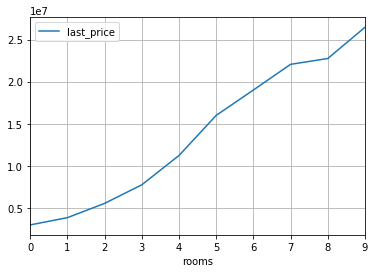

In [32]:
#собирем сводную таблицу по кличеству комнат и среднему значению цены квартиры и построим линейный график
df_new.pivot_table(index='rooms', values='last_price').plot(grid=True)

Из данного графика видим четкую зависимость цены продажи от количества комнат, то есть чем больше комнат, тем выше цена за квартиру.

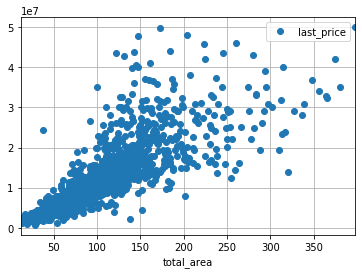

In [33]:
# построим диаграмму рассеивания по площади кваритиры и средней цены
df_new.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o')

Мы видим что зависимость есть, как и показал коэффициент корреляции, но с увеличением площади расброс цены становится больше. Возможно на это влияют еще и другие факторы, например, наличие ремонта или местоположение квартиры.

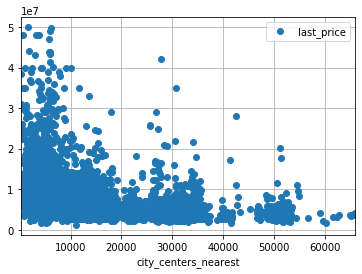

In [34]:
# построим диаграмму рассеивания расстояния до центра и средней цены
df_new.pivot_table(index='city_сenters_nearest', values='last_price').plot(grid=True, style='o')

Здесь уже не так однозначно можно наблюдать зависимость, как на предудыщих графиках. Чем дальше от центра города, тем меньше квартир,но и тем меньше их цена. Но цена за квартиру может уменьшаться и за счет уменьшения ее площади. Поэтому однозначо сказать что зависимость есть на данном этапе нельзя.

Посмотрим как зависит цена от того, на каком этаже расположена квартира: первом, последнем или другом. Для посчитаем средную цену продажи по трем типам раположения квартиры в доме: 

In [35]:
df_new.pivot_table(index='floor_category', values='last_price')

,last_price
floor_category,
другой,6.216056e+06
первый,4.641117e+06
последний,5.837676e+06


Получаем, что самая недорогая категория квартир располагается на первом этаже, далее идет последний этаж. Что и следовало доказать: квартиры, которые располагаются на первом и последнем  этажам пользуются меньшей популярностью, чем остальные, поэтому и стоят дешевле.

Теперь рассмотрим как влияет на цену дата размещения: год, день недели и месяц

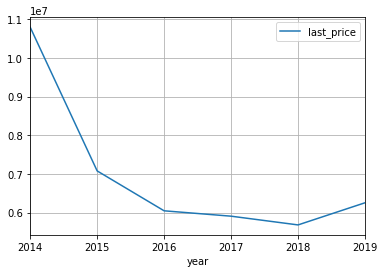

In [36]:
#зависимость цены от года
df_new.pivot_table(index='year', values='last_price').plot(grid=True)

Мы видим самая дорогая цена была в 2014 году, потом она снижалась до 2018 года. В 2019 цены пошли вверх на квартиры до уровня чуть выше 2016.

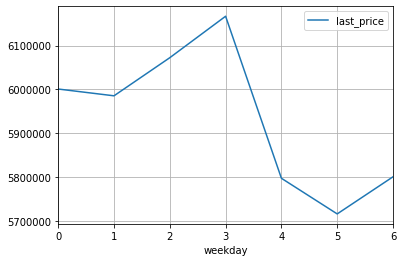

In [37]:
#зависимость цены от дня недели
df_new.pivot_table(index='weekday', values='last_price').plot(grid=True)

Пик цены попадает на четверг, потом резкое падение до субботы и в воскресенье цена поднимается до уровня пятницы.

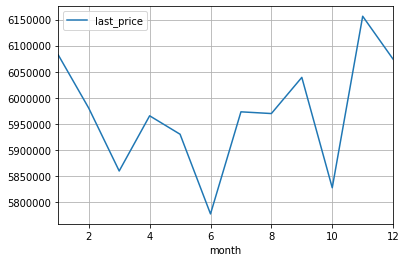

In [38]:
#зависимость цены от месяца
df_new.pivot_table(index='month', values='last_price').plot(grid=True)

Наблюдаются три падения цены на квартиру в марте, июне (самая низкая) и в октябре. Возможно это связано с падением спроса в сезон отпусков.

Выделим первых десять населенных пунктов, в которых наибольшее количество объявлений:

In [39]:
df_new['locality_name_corrected'].value_counts(dropna=False).head(10)

Санкт-Петербург    15546
Мурино               588
Кудрово              472
Шушары               440
Всеволожск           398
Пушкин               369
Колпино              338
Парголово            327
Гатчина              306
Выборг               237
Name: locality_name_corrected, dtype: int64

In [40]:
#сохраним эти названия в список
best=df_new['locality_name_corrected'].value_counts(dropna=False).head(10).index
best

Index(['Санкт-Петербург', 'Мурино', 'Кудрово', 'Шушары', 'Всеволожск',
       'Пушкин', 'Колпино', 'Парголово', 'Гатчина', 'Выборг'],
      dtype='object')

In [41]:
#отфильтруем метом query() и сделаем сводник по средней цене за квадратный метр методом pivot_table
#отсортируем по убыванию
(
    df_new.query('locality_name_corrected in @best')
    .pivot_table(index='locality_name_corrected', values='square_meter', aggfunc='median')
    .sort_values(by='square_meter', ascending=False)
) 

,square_meter
locality_name_corrected,
Санкт-Петербург,104545.454545
Пушкин,100000.000000
Кудрово,95675.473579
Парголово,91642.857143
Мурино,86175.643522
Шушары,76876.172608
Колпино,74723.748474
Гатчина,67860.569236
Всеволожск,65789.473684


Получили таблицу из 10 самых популярных населенных пунктов. Из них самый дорогой получился в СПб и самый дешевый квадратный метр в Выборге.

In [42]:
df_spb=df_new.query('locality_name_corrected=="Санкт-Петербург"')
df_spb

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,ponds_nearest,days_exposition,locality_name_corrected,square_meter,year,weekday,month,floor_category,ratio_living,ratio_kitchen
0,20,13000000.0,108.00,2019-03-07,3,2.70,16.0,51.0,8,NaN,...,755.0,NaN,Санкт-Петербург,120370.370370,2019,3,3,другой,0.472222,0.231481
2,10,5196000.0,56.00,2015-08-20,2,NaN,5.0,34.3,4,NaN,...,574.0,558.0,Санкт-Петербург,92785.714286,2015,3,8,другой,0.612500,0.148214
4,2,10000000.0,100.00,2018-06-19,2,3.03,14.0,32.0,13,NaN,...,48.0,121.0,Санкт-Петербург,100000.000000,2018,1,6,другой,0.320000,0.410000
7,5,7915000.0,71.60,2019-04-18,2,NaN,24.0,NaN,22,NaN,...,NaN,NaN,Санкт-Петербург,110544.692737,2019,3,4,другой,NaN,0.263966
9,18,5400000.0,61.00,2017-02-26,3,2.50,9.0,43.6,7,NaN,...,NaN,289.0,Санкт-Петербург,88524.590164,2017,6,2,другой,0.714754,0.106557
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23689,13,3550000.0,35.30,2018-02-28,1,2.86,15.0,16.3,4,NaN,...,652.0,29.0,Санкт-Петербург,100566.572238,2018,2,2,другой,0.461756,0.257790
23690,3,5500000.0,52.00,2018-07-19,2,NaN,5.0,31.0,2,NaN,...,NaN,15.0,Санкт-Петербург,105769.230769,2018,3,7,другой,0.596154,0.115385
23691,11,9470000.0,72.90,2016-10-13,2,2.75,25.0,40.3,7,NaN,...,806.0,519.0,Санкт-Петербург,129903.978052,2016,3,10,другой,0.552812,0.145405
23694,9,9700000.0,133.81,2017-03-21,3,3.70,5.0,73.3,3,NaN,...,381.0,NaN,Санкт-Петербург,72490.845228,2017,1,3,другой,0.547792,0.103356


In [46]:
df_spb['city_centers_nearest']=(df_spb['city_сenters_nearest']/1000).round(decimals=0)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


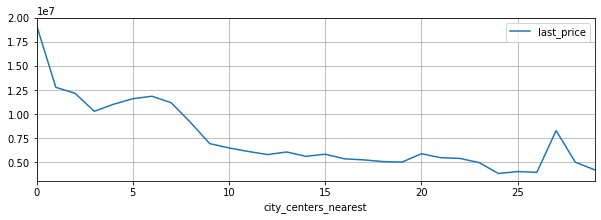

In [44]:
df_spb.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True, figsize=(10, 3))

Согласно графику определим границу центра города в пределах 6 км, там где начинается резкое падение цены продажи. 

### Cегмент квартир в центре.

In [88]:
#отфильтруем объявления, которые находятся в радиусе 6 км от центра
df_centre_spb=df_spb.query('city_centers_nearest<=6')
df_centre_spb.head(5)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,...,days_exposition,locality_name_corrected,square_meter,year,weekday,month,floor_category,ratio_living,ratio_kitchen,city_centers_nearest
24,8,6500000.0,97.2,2015-10-31,2,NaN,3.0,46.5,1,NaN,...,265.0,Санкт-Петербург,66872.427984,2015,5,10,первый,0.478395,0.201646,2.0
35,6,15500000.0,149.0,2017-06-26,5,NaN,5.0,104.0,4,NaN,...,644.0,Санкт-Петербург,104026.845638,2017,0,6,другой,0.697987,0.114094,4.0
61,18,7990000.0,74.0,2017-08-24,2,NaN,4.0,43.0,4,NaN,...,609.0,Санкт-Петербург,107972.972973,2017,3,8,последний,0.581081,0.270270,4.0
63,2,20000000.0,118.0,2018-09-11,3,3.0,9.0,68.0,7,NaN,...,37.0,Санкт-Петербург,169491.525424,2018,1,9,другой,0.576271,0.135593,5.0
99,32,9600000.0,90.0,2017-09-26,4,NaN,5.0,67.0,2,NaN,...,104.0,Санкт-Петербург,106666.666667,2017,1,9,другой,0.744444,0.088889,3.0


Построим гистограммы и изучим следуюшие показатели: площадь, цена, количество комнат и высота потолков. 

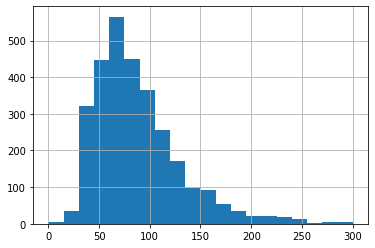

In [84]:
#гистограмма для площади
df_centre_spb['total_area'].hist(bins=20, range=(0, 300))

In [70]:
df_centre_spb['total_area'].describe()

count    2982.000000
mean       87.743696
std        44.120107
min        12.000000
25%        57.500000
50%        78.300000
75%       107.225000
max       356.000000
Name: total_area, dtype: float64

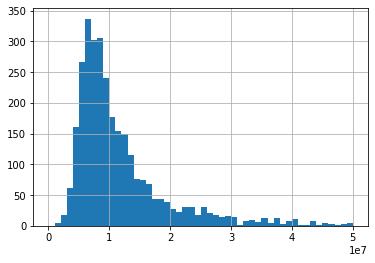

In [87]:
df_centre_spb['last_price'].hist(bins=50, range=(0, 50000000))

In [71]:
#гистограмма для цены
df_centre_spb['last_price'].describe()

count    2.982000e+03
mean     1.156455e+07
std      7.652462e+06
min      1.600000e+06
25%      6.700000e+06
50%      9.010000e+06
75%      1.350000e+07
max      4.990000e+07
Name: last_price, dtype: float64

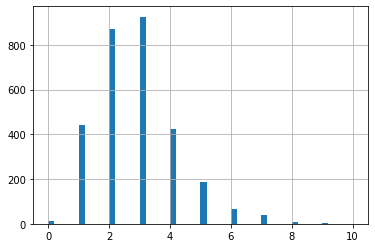

In [75]:
#гистограмма для числа комнат
df_centre_spb['rooms'].hist(bins=50, range=(0, 10))

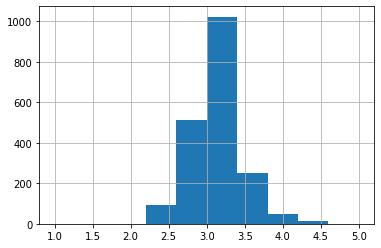

In [82]:
#гистограмма для высоты потолка
df_centre_spb['ceiling_height'].hist(bins=10, range=(1, 5))

Из полученных выше данных мы видим что:

* площадь квартир в основном варьируется от 30 до 170 кв.м, при чем пик приходится на 70-75 кв.м
* наиболее часто встречающаяся цена за объект в районе 7-8 млн руб, а диапазон цен в основном от 4 до 20 млн р.
* число комнат- чаще всего встречаются объявление на двухкомнатные и трехкомнатные квартиры.
* высота пололка - самая распространеная высота 3 м.

Теперь посмотрим как влияет дата размещения объявления на цену:


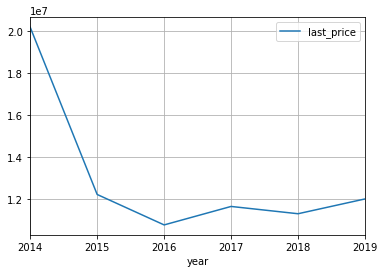

In [89]:
#зависимость цены от года
df_centre_spb.pivot_table(index='year', values='last_price').plot(grid=True)

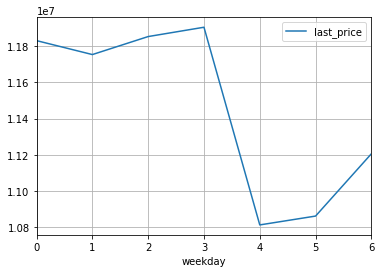

In [90]:
#зависимость цены от дня недели
df_centre_spb.pivot_table(index='weekday', values='last_price').plot(grid=True)

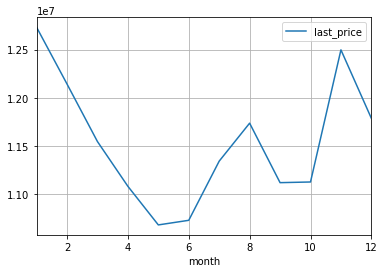

In [91]:
#зависимость цены от месяца
df_centre_spb.pivot_table(index='month', values='last_price').plot(grid=True)

Можем сделать следующие выводы, как менялась цена:
* пик цены приходится на 2014 год, далее идет падение цены до 2016 года и далее до 2019 удерживается на уровне 12 млн.р.
* цена держится с понедельника по четверг на максимальном уровне, потом резко падает к четвергу. Далее до воскресенья немного растет вверх.
* если рассматривать по месяцам, то наблюдаем следующую картину: с ноября по май цена падает, с июня по ноябрь - цена растет, но в этот период происходит провал не значительный цены в сентябре.

Теперь рассмотрим как зависит цена от количества комнат, расстояния до центра и площадь квартиры:

Посчитаем коэффициенты взаимной корреляции

In [92]:
df_centre_spb[['last_price', 'total_area', 'rooms', 'city_сenters_nearest']].corr()

,last_price,total_area,rooms,city_сenters_nearest
last_price,1.000000,0.697968,0.434996,-0.030335
total_area,0.697968,1.000000,0.796824,-0.080024
rooms,0.434996,0.796824,1.000000,-0.148423
city_сenters_nearest,-0.030335,-0.080024,-0.148423,1.000000


Самая сильная взаимная корреляция наблюдается у цены и площади. У количества комнат и цены коэффиициент корреляции всего 0.43. А у расстояния до центра и цены практически равен 0.

Посмотрим теперь графически, есть ли зависимость:

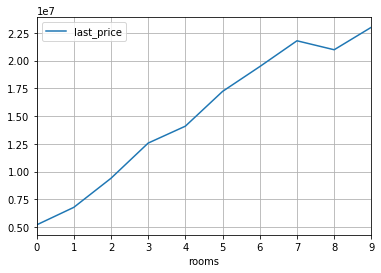

In [93]:
#собирем сводную таблицу по количеству комнат и среднему значению цены квартиры и построим линейный график
df_centre_spb.pivot_table(index='rooms', values='last_price').plot(grid=True)

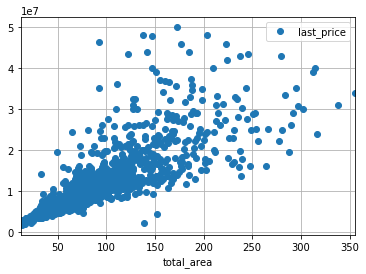

In [94]:
# построим диаграмму рассеивания по площади кваритиры и средней цены
df_centre_spb.pivot_table(index='total_area', values='last_price').plot(grid=True, style='o')

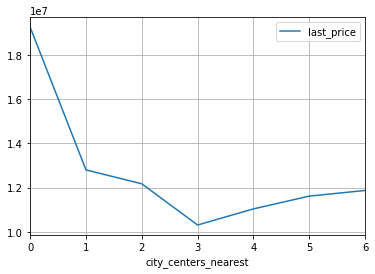

In [99]:
# построим линейный график расстояния до центра и средней цены
df_centre_spb.pivot_table(index='city_centers_nearest', values='last_price').plot(grid=True)

Исходя из полученных графиков может сделать следующие выводы:
* наблюдается прямопропорциональная зависимость цены от количества комнат, то есть чем больше комнат, тем дороже квартира.
* с увеличением площади цена тоже растет, но чем больше площадь квартиры тем диапозон цены становится шире. скорей всего на эту зависимость еще что то влияет, например качество ремонта.
* также на цену влияет и расстояние от центра, чем ближе к центру тем цена дороже.

Какие выводы мы можем сделать, если сравним результаты, полученные для центра города и для общей базы данных:
* Все гистрограммы смещены вправо в сторону увеличение, то есть в центре города средняя цена на квартиру, ее площадь, количество комнат и даже высота потолков выше, чем в общей массе.
* чем дальше от центра города, то смещается приоритетность количества комнат в сторону уменьшения. ( в центре самая популярная с тремя, а в общей базе 1-2 комнаты)



## Общий вывод

В ходе нашего исследования мы изучили данные сервиса Яндекс Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктах за несколько лет. Были обнаружены многочисленные пропуски, даже в locality_name — название населённого пункта. Рекомендации для разработчиков - сделать список обязательных полей для заполнения, в который будут также входить: населенный пункт, число этажей в доме (или галочка "не первый/не последний"), площадь кухни.

Мы выяснили какие факторы больше всего влияют на цену квартиры в сторону увеличения:
* количество комнат
* если квартира находится не на первом и не на последнем этаже
* ее местоположение, чем ближе к центру города, тем цена дороже.
